**Importing important libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Handling and Preprocessing**

In [2]:
# Load the data
df = pd.read_csv('/content/russia_losses.csv')

In [3]:
df.head(5)

,date_end,date_start,APV,Ammunition/fuel depot,Anti-aircraft warfare systems,Cannons,MRL,Mortar/ATGM/MG,Radio equipment,Self-propelled artillery,Strongpoint,Tanks,Vehicles,Personnel
0,2023-06-25,2023-06-19,59,3.0,NaN,3,3.0,6.0,4.0,8.0,15,22.0,25.0,43.0
1,2023-07-03,2023-06-26,27,7.0,NaN,4,2.0,2.0,4.0,4.0,3,9.0,23.0,23.0
2,2023-07-10,2023-07-03,18,3.0,NaN,1,1.0,6.0,11.0,4.0,12,17.0,12.0,NaN
3,2023-07-17,2023-07-10,15,8.0,NaN,5,1.0,3.0,16.0,2.0,20,12.0,8.0,137.0
4,2023-07-24,2023-07-17,36,3.0,3.0,5,NaN,NaN,12.0,1.0,18,21.0,23.0,76.0


In [4]:
df.shape

(48, 14)

In [5]:
df.dtypes

,0
date_end,object
date_start,object
APV,int64
Ammunition/fuel depot,float64
Anti-aircraft warfare systems,float64
Cannons,int64
MRL,float64
Mortar/ATGM/MG,float64
Radio equipment,float64
Self-propelled artillery,float64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_end                       48 non-null     object 
 1   date_start                     48 non-null     object 
 2   APV                            48 non-null     int64  
 3   Ammunition/fuel depot          47 non-null     float64
 4   Anti-aircraft warfare systems  37 non-null     float64
 5   Cannons                        48 non-null     int64  
 6   MRL                            39 non-null     float64
 7   Mortar/ATGM/MG                 47 non-null     float64
 8   Radio equipment                47 non-null     float64
 9   Self-propelled artillery       48 non-null     float64
 10  Strongpoint                    48 non-null     int64  
 11  Tanks                          48 non-null     float64
 12  Vehicles                       48 non-null     float

In [7]:
# Convert date columns to datetime
df['date_start'] = pd.to_datetime(df['date_start'], format='%Y-%m-%d')
df['date_end'] = pd.to_datetime(df['date_end'], format='%Y-%m-%d')

In [8]:
# Create a new feature 'duration'
df['duration'] = (df['date_end'] - df['date_start']).dt.days

In [9]:
df.isna()

,date_end,date_start,APV,Ammunition/fuel depot,Anti-aircraft warfare systems,Cannons,MRL,Mortar/ATGM/MG,Radio equipment,Self-propelled artillery,Strongpoint,Tanks,Vehicles,Personnel,duration
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [10]:
df.isna().sum()

,0
date_end,0
date_start,0
APV,0
Ammunition/fuel depot,1
Anti-aircraft warfare systems,11
Cannons,0
MRL,9
Mortar/ATGM/MG,1
Radio equipment,1
Self-propelled artillery,0


In [11]:
#Impute Missing Values with Zero
df = df.fillna(0)
print(df.isnull().sum())

date_end                         0
date_start                       0
APV                              0
Ammunition/fuel depot            0
Anti-aircraft warfare systems    0
Cannons                          0
MRL                              0
Mortar/ATGM/MG                   0
Radio equipment                  0
Self-propelled artillery         0
Strongpoint                      0
Tanks                            0
Vehicles                         0
Personnel                        0
duration                         0
dtype: int64


In [12]:
df.describe()

,date_end,date_start,APV,Ammunition/fuel depot,Anti-aircraft warfare systems,Cannons,MRL,Mortar/ATGM/MG,Radio equipment,Self-propelled artillery,Strongpoint,Tanks,Vehicles,Personnel,duration
count,48,48,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0000,48.000000,48.000000
mean,2023-12-16 18:30:00,2023-12-09 05:00:00,53.500000,11.250000,2.166667,50.229167,2.916667,6.500000,13.208333,12.375000,204.062500,32.833333,73.5000,152.854167,7.562500
min,2023-06-25 00:00:00,2023-06-19 00:00:00,15.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,8.000000,8.0000,0.000000,4.000000
25%,2023-09-16 06:00:00,2023-09-09 06:00:00,34.000000,4.000000,1.000000,29.000000,1.000000,3.000000,4.000000,7.500000,62.500000,20.750000,36.2500,70.250000,7.000000
50%,2023-12-07 12:00:00,2023-11-30 12:00:00,42.500000,8.000000,2.000000,49.500000,2.500000,5.000000,10.000000,11.000000,163.500000,31.000000,59.5000,147.000000,7.000000
75%,2024-03-19 18:00:00,2024-03-07 12:00:00,60.500000,13.000000,3.000000,65.000000,4.000000,8.000000,19.000000,15.250000,310.000000,39.500000,104.2500,206.000000,7.000000
max,2024-07-08 00:00:00,2024-06-24 00:00:00,174.000000,85.000000,9.000000,175.000000,18.000000,23.000000,75.000000,52.000000,777.000000,88.000000,353.0000,441.000000,14.000000
std,NaN,NaN,31.874087,12.947521,2.014134,35.554118,3.065479,4.824582,13.360721,9.023904,175.205218,16.118357,55.9829,101.397677,2.041133


## **Exploratory Data Analysis (EDA)**

Trend Analysis

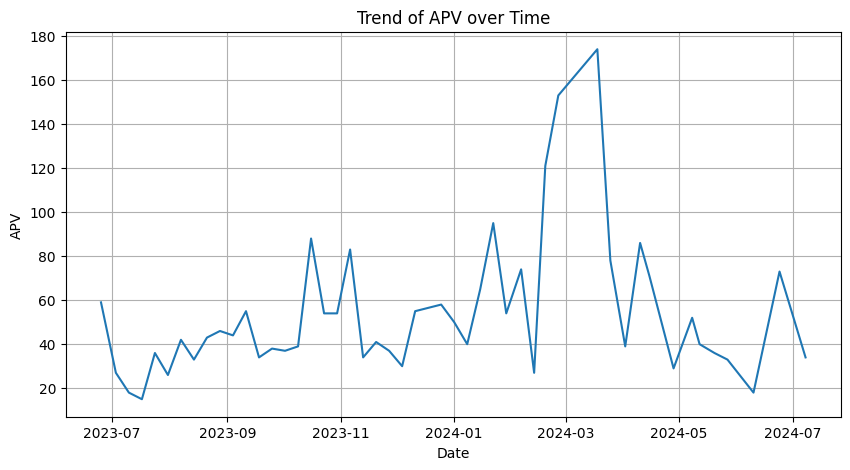

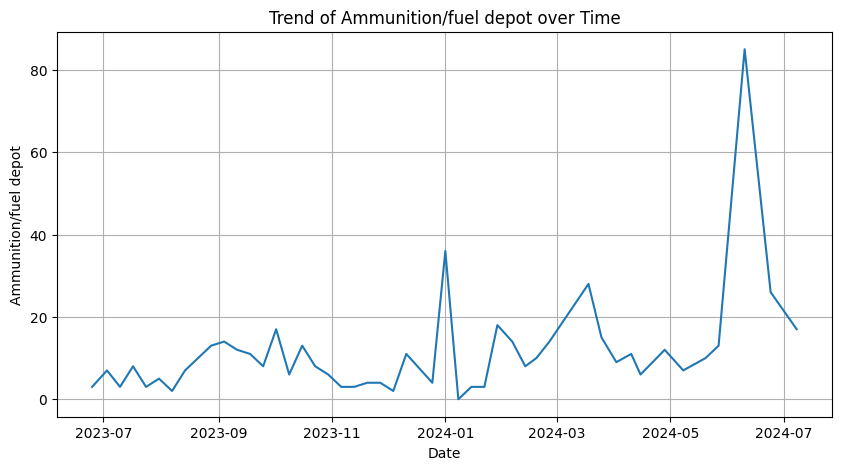

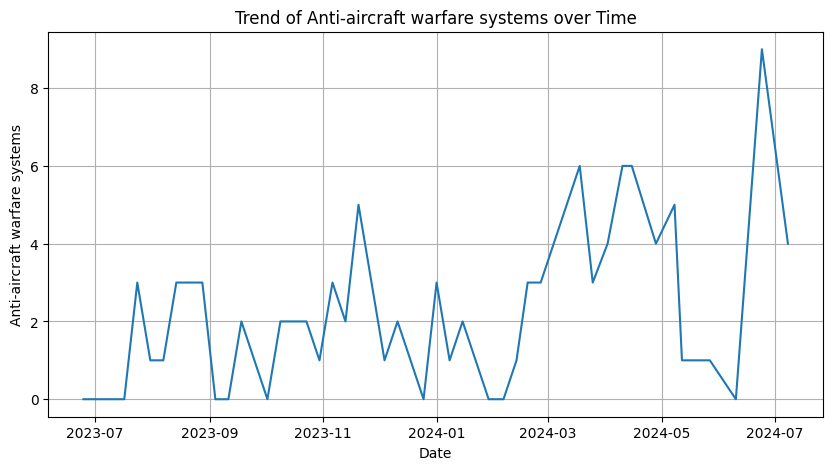

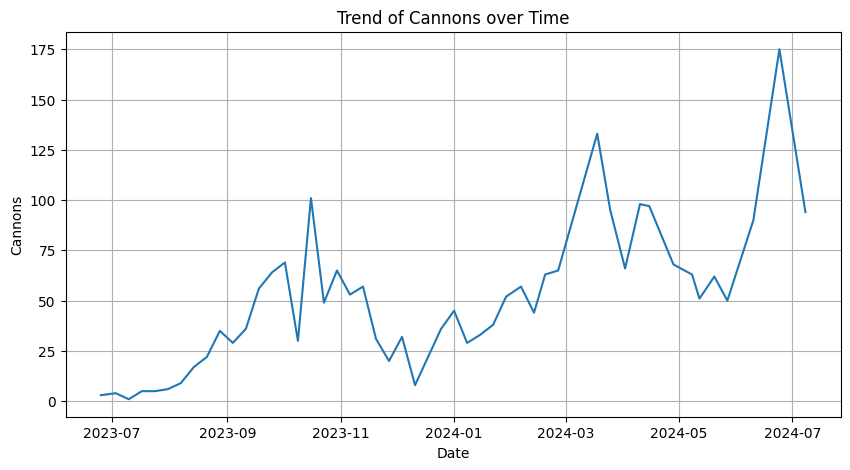

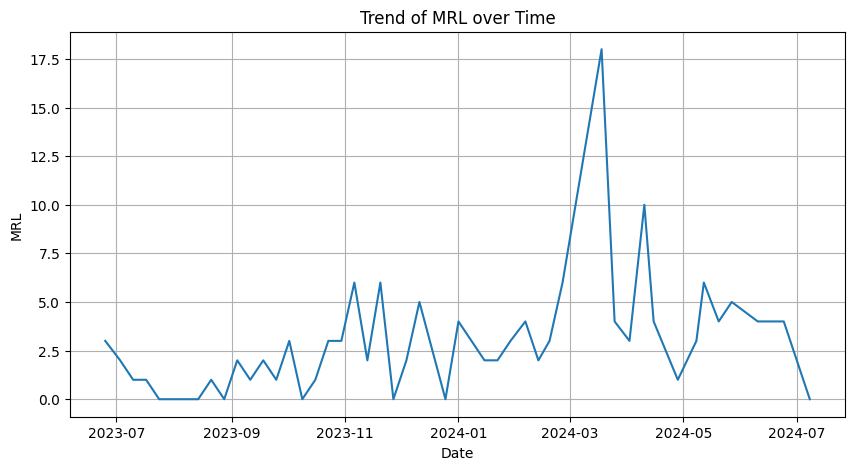

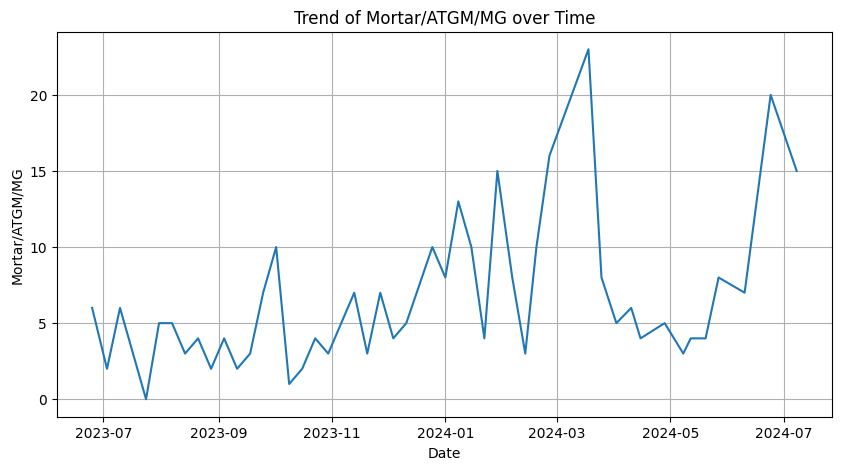

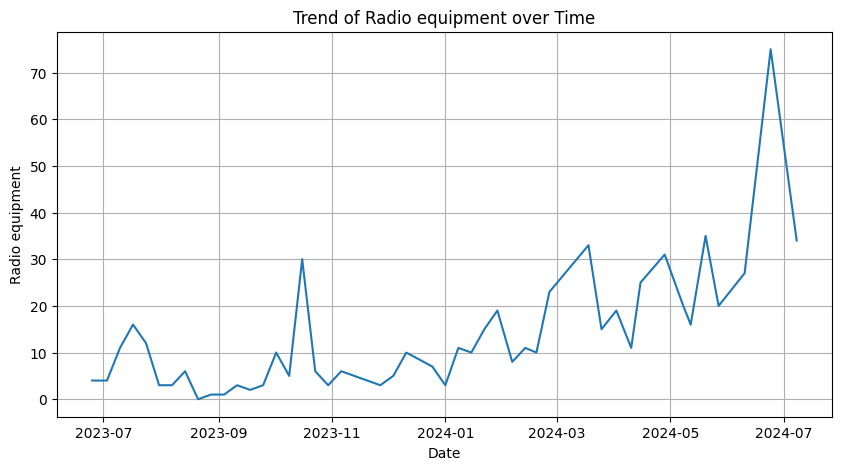

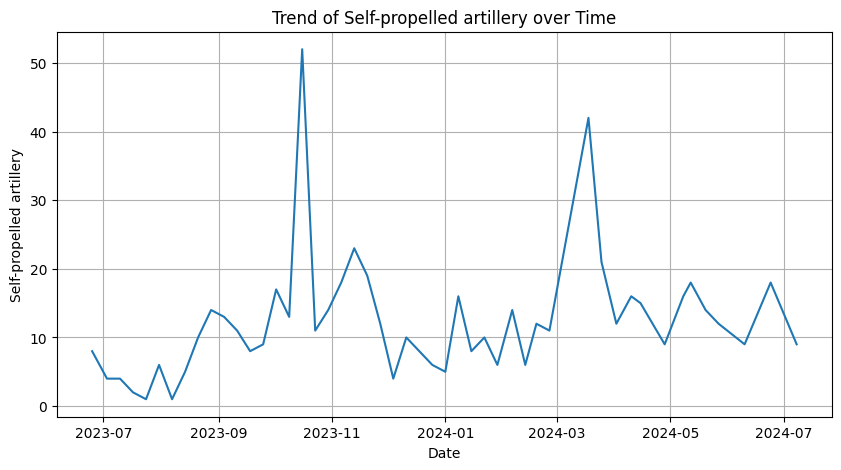

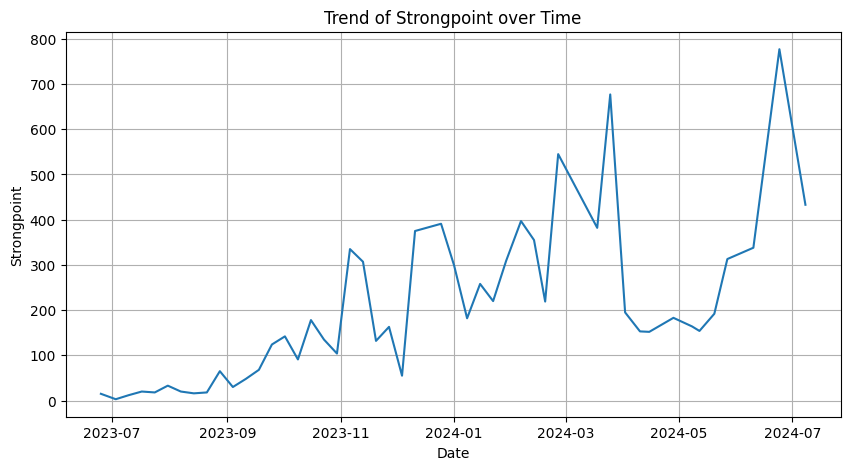

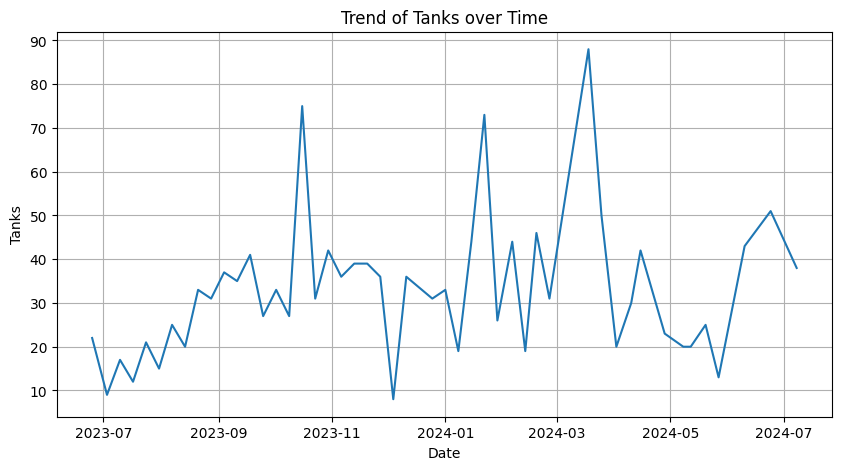

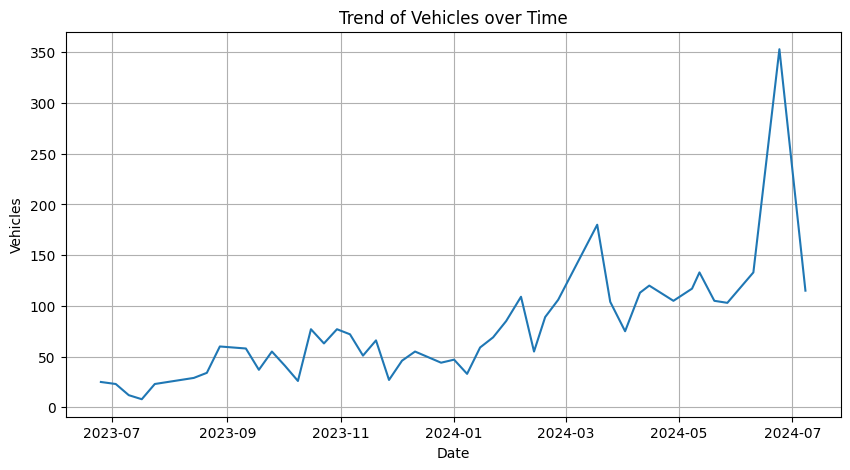

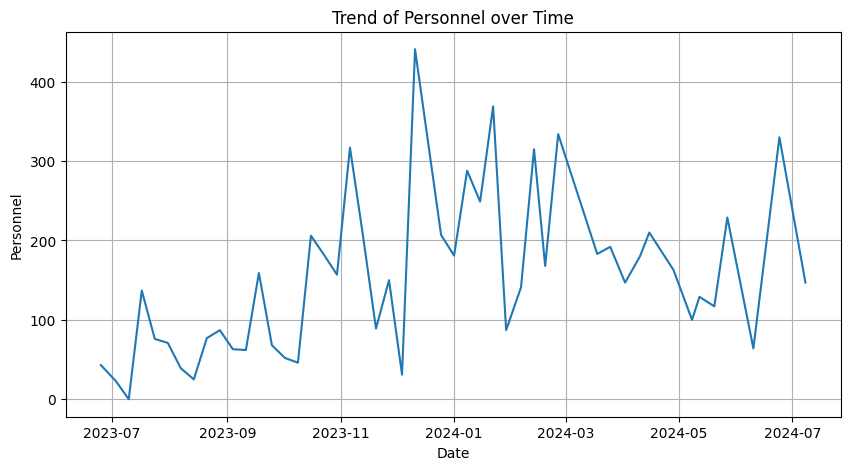

In [13]:
# Plotting each type of loss over time
for col in df.columns[2:-1]:  # Excluding date columns and 'duration'
    plt.figure(figsize=(10, 5))
    plt.plot(df['date_end'], df[col])
    plt.title(f'Trend of {col} over Time')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

Correlation Matrix

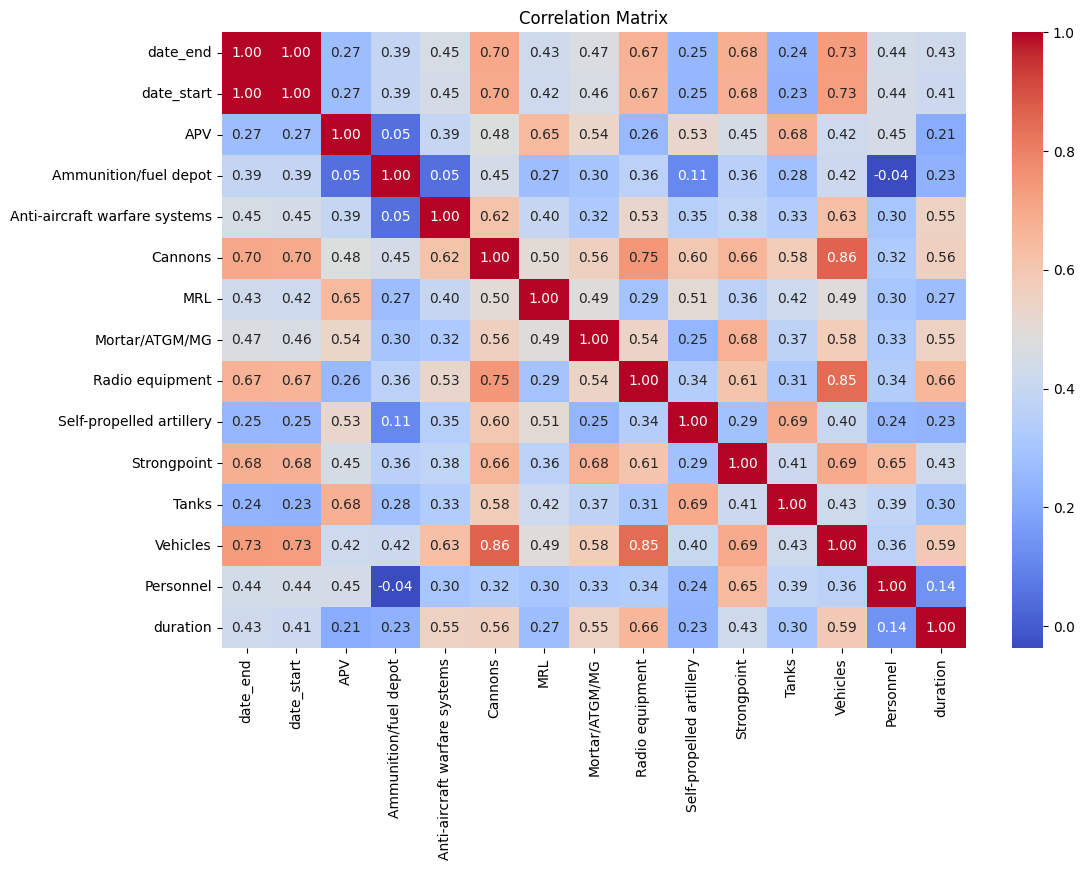

In [14]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## **Time Series Analysis**

In [15]:
df.columns

Index(['date_end', 'date_start', 'APV', 'Ammunition/fuel depot',
       'Anti-aircraft warfare systems', 'Cannons', 'MRL', 'Mortar/ATGM/MG',
       'Radio equipment', 'Self-propelled artillery', 'Strongpoint', 'Tanks',
       'Vehicles', 'Personnel', 'duration'],
      dtype='object')

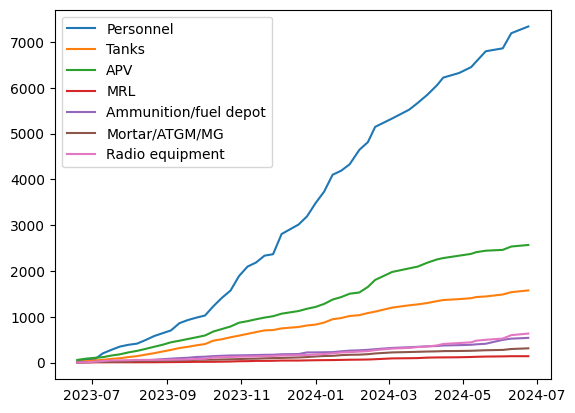

In [16]:
#Time series commulative losses
plt.plot(df['date_start'],df['Personnel'].cumsum(), label='Personnel')
plt.plot(df['date_start'],df['Tanks'].cumsum(), label='Tanks')
plt.plot(df['date_start'],df['APV'].cumsum(), label='APV')
plt.plot(df['date_start'],df['MRL'].cumsum(), label='MRL')
plt.plot(df['date_start'],df['Ammunition/fuel depot'].cumsum(), label='Ammunition/fuel depot')
plt.plot(df['date_start'],df['Mortar/ATGM/MG'].cumsum(), label='Mortar/ATGM/MG')
plt.plot(df['date_start'],df['Radio equipment'].cumsum(), label='Radio equipment')
plt.legend()
plt.show()

Forecasting

In [17]:
df.set_index('date_end', inplace=True)

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample the data on a weekly basis (assuming weekly frequency)
numeric_columns = ['APV','Ammunition/fuel depot','Anti-aircraft warfare systems', 'Cannons', 'MRL', 'Mortar/ATGM/MG','Radio equipment', 'Self-propelled artillery', 'Strongpoint', 'Tanks',
'Vehicles', 'Personnel', 'duration' ]
weekly_data = df[numeric_columns].resample('W').sum()

In [19]:
df.reset_index(inplace=True)

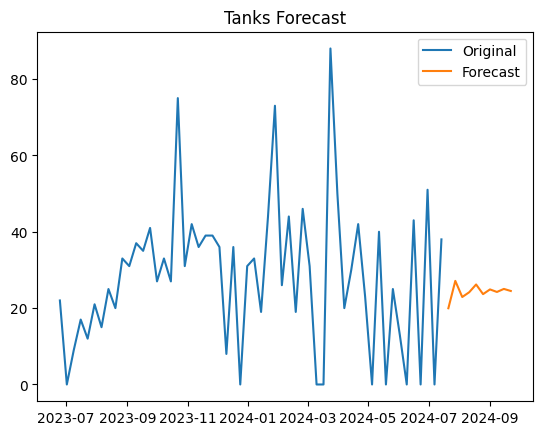

In [20]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model for forecasting (example with 'Tanks')
model = ARIMA(weekly_data['Tanks'], order=(5,1,0))  # p, d, q values can be tuned
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=10)  # Forecast next 10 steps
plt.plot(weekly_data['Tanks'], label='Original')
plt.plot(forecast, label='Forecast')
plt.title('Tanks Forecast')
plt.legend()
plt.show()

## **Predictive Modeling**
Feature Engineering: Lag Features

In [21]:
# Creating lag features
for col in df.columns[2:]:
    df[f'{col}_lag1'] = df[col].shift(1)
    df[f'{col}_lag2'] = df[col].shift(2)

# Drop NA values created by lagging
df.dropna(inplace=True)


In [31]:
equipment_columns = ['Tanks', 'APV', 'Cannons', 'MRL', 'Mortar/ATGM/MG',
                     'Radio equipment', 'Self-propelled artillery', 'Vehicles']

df['total_equipment_losses'] = df[equipment_columns].sum(axis=1)

In [33]:
df['personnel_to_equipment_ratio']=df['Personnel']/df['total_equipment_losses']
df['personnel_to_equipment_ratio']

,personnel_to_equipment_ratio
2,0.000000
3,2.209677
4,0.775510
5,0.825581
6,0.348214
7,0.221239
8,0.523810
9,0.460317
10,0.333333
11,0.308458


In [34]:
df['total_equipment_losses']

,total_equipment_losses
2,70.0
3,62.0
4,98.0
5,86.0
6,112.0
7,113.0
8,147.0
9,189.0
10,189.0
11,201.0


Regression Model

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error

# Features and target for total tanks loss prediction
X = df.drop(columns=['Tanks', 'date_start', 'date_end'])
y = df['Tanks']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [30]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}, R^2: {r2}')
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
# mse : 751.sommething...
# rmse: fucked ig

MAE: 20.176721313589127, R^2: -4.954820282477896
MSE: 761.5619659260982
RMSE: 27.59641219300252


In [36]:
#for total personnel losses prediction
x=df[['total_equipment_losses', 'Strongpoint']]
y=df[['Personnel']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("y-prediction",y_pred)
print("lr score",lr.score(x_test,y_test))
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("Mean Sqauared Error: ", mse)
print("Root Mean Squared Error: ",rmse)
print("R-Squared: ",r2)

y-prediction [[137.21817125]
 [195.0467304 ]
 [180.63432424]
 [ 86.39842375]
 [105.05528641]
 [160.35716841]
 [210.1663788 ]
 [122.81843023]
 [130.22835732]
 [259.53964459]]
lr score 0.2454356180518078
Mean Sqauared Error:  11093.492358745028
Root Mean Squared Error:  105.32564910194016
R-Squared:  0.2454356180518078


In [37]:
x=df[['APV','Anti-aircraft warfare systems', 'MRL', 'Strongpoint', 'Tanks','Vehicles']]
y=df[['Personnel']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("y-prediction",y_pred)
print("lr score",lr.score(x_test,y_test))
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("Mean Sqauared Error: ", mse)
print("Root Mean Squared Error: ",rmse)
print("R-Squared: ",r2)

y-prediction [[139.30848198]
 [197.62095092]
 [198.19988821]
 [108.14917535]
 [ 81.45901995]
 [268.40308448]
 [240.37313386]
 [123.99723098]
 [132.1006246 ]
 [417.36250345]]
lr score 0.08267775931982002
Mean Sqauared Error:  13486.333984143905
Root Mean Squared Error:  116.13067632690299
R-Squared:  0.08267775931982002


In [39]:
#using descision tree regressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [44]:
pred = model.predict(x_test)
print(pred)
print("MSE: ",mean_squared_error(y_test,pred))
print("MAE: ",mean_absolute_error(y_test,pred))
rmse=np.sqrt(mean_squared_error(y_test,pred))
print("RMSE: ",rmse)
print("R2 Score: ",r2_score(y_test,pred))

[181. 317. 100.  71.  52. 206. 206.  46. 181. 192.]
MSE:  6674.5
MAE:  68.1
RMSE:  81.69761318422957
R2 Score:  0.5460095158092348


In [45]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=500, random_state=0)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
mse_rf=mean_squared_error(y_test,y_pred_rf)
rmse_rf=np.sqrt(mse_rf)
r2_rf=r2_score(y_test,y_pred_rf)
print("Mean Squared Error: ", mse_rf)
print("Root Mean Squared Error: ", rmse_rf)
print("R2 square: ",r2_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error:  10348.157066000002
Root Mean Squared Error:  101.72589181717701
R2 square:  0.29613231899386805


In [47]:
#after changing the dependencies for the total loss of personnel
x=df[['APV','MRL', 'Strongpoint', 'Tanks','Vehicles']]
y=df[['Personnel']]
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x,y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(x_train_1,y_train_1)
y_pred=lr.predict(x_test_1)
print("y-prediction",y_pred)
print("lr score",lr.score(x_test_1,y_test_1))
print("Mean Squared Error: ", mse_rf)
print("Root Mean Squared Error: ", rmse_rf)
print("R2 square: ",r2_rf)

y-prediction [[138.19815162]
 [198.51214548]
 [192.22522845]
 [106.81514778]
 [ 84.33922674]
 [263.94324526]
 [233.49872968]
 [122.26176012]
 [136.64298164]
 [409.07962524]]
lr score 0.12251011006317636
Mean Squared Error:  10348.157066000002
Root Mean Squared Error:  101.72589181717701
R2 square:  0.29613231899386805


In [50]:
#Decision tree
model = DecisionTreeRegressor()
model.fit(x_train_1,y_train_1)
pred = model.predict(x_test_1)
print("MSE: ",mean_squared_error(y_test_1,pred))
rmse=np.sqrt(mean_squared_error(y_test_1,pred))
print("RMSE: ",rmse)
print(r2_score(y_test_1,pred))

MSE:  6598.5
RMSE:  81.23115165993893
0.5511789332635009


In [51]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=500, random_state=0)
rf.fit(x_train_1,y_train_1)
y_pred_rf=rf.predict(x_test_1)
mse_rf=mean_squared_error(y_test_1,y_pred_rf)
rmse_rf=np.sqrt(mse_rf)
r2_rf=r2_score(y_test,y_pred_rf)
print("Mean Squared Error: ", mse_rf)
print("Root Mean Squared Error: ", rmse_rf)
print("R2 square: ",r2_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error:  11007.9281936
Root Mean Squared Error:  104.91867418910707
R2 square:  0.2512555771144447


In [52]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train_1, y_train_1)
y_pred_gb = gb.predict(x_test_1)
# Evaluate the model (calculate RMSE, R-squared, etc.)
mse_gb=mean_squared_error(y_test_1,y_pred_gb)
rmse_gb=np.sqrt(mse_gb)
r2_gb=r2_score(y_test_1,y_pred_gb)
print("Mean Squared Error: ", mse_gb)
print("Root Mean Squared Error: ", rmse_gb)
print("R2 square: ",r2_gb)

Mean Squared Error:  10863.655368625294
Root Mean Squared Error:  104.22886053596334
R2 square:  0.26106882000392506


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train_1, y_train_1)
y_pred_svr = svr.predict(x_test_1)
# Evaluate the model
mse_svr=mean_squared_error(y_test_1,y_pred_svr)
rmse_svr=np.sqrt(mse_svr)
r2_svr=r2_score(y_test_1,y_pred_svr)
print("Mean Squared Error: ", mse_svr)
print("Root Mean Squared Error: ", rmse_svr)
print("R2 square: ",r2_svr)

Mean Squared Error:  15903.2028660467
Root Mean Squared Error:  126.10790167965963
R2 square:  -0.08171440097992444


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: xlabel='Personnel'>

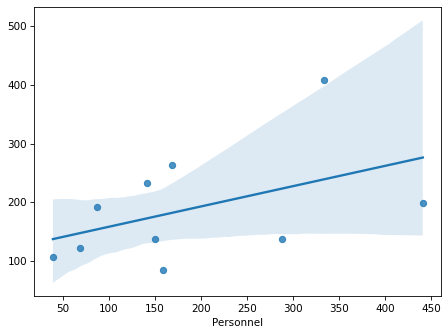

In [55]:
plt.figure(figsize=(7,5), dpi=75)
sns.regplot(x=y_test_1,y=y_pred)

Classification Model

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'Personnel' losses as target for classification (binary classification as an example)
df['high_loss'] = np.where(df['Personnel'] > df['Personnel'].median(), 1, 0)

X = df.drop(columns=['Personnel', 'date_start', 'date_end', 'high_loss'])
y = df['high_loss']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.6
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.43      1.00      0.60         3

    accuracy                           0.60        10
   macro avg       0.71      0.71      0.60        10
weighted avg       0.83      0.60      0.60        10



### **Model Evaluation and Improvement**
Feature Importance

In [24]:
print(len(X.columns))
print(len(rf.feature_importances_))
# 39 38

38
38


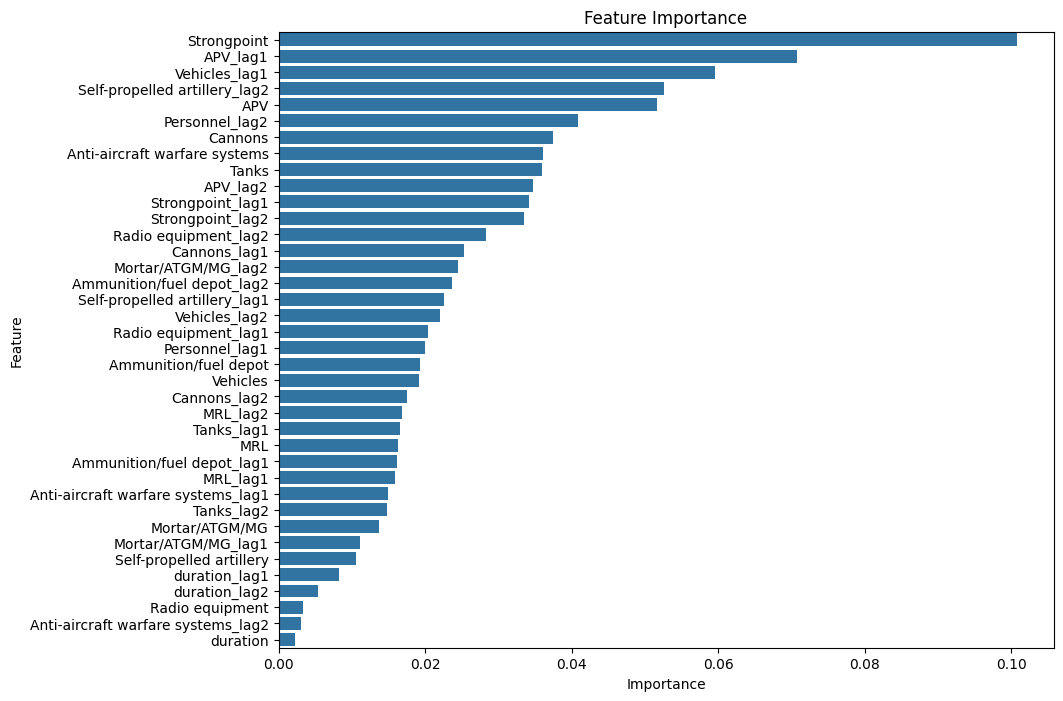

In [25]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()
# won't work as arrays length are not same

### **Advanced Techniques and Model Tuning**
Grid Search for Hyperparameter Tuning


In [26]:
from sklearn.model_selection import GridSearchCV

# Example with Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
#at first won't run as the size is small
# but at columns 200 and important features 39 it'll give this output
# Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
